### Áp dụng Deep Learning để dự báo kết quả tiếp cận thành công một campaign quảng cáo

Bài viết này mình thử dùng thuật toán Artificial Neural Network (ANN) để xử lí một tệp dữ liệu marketing đơn giản, mục đích thử phân loại xem hành vi Yes/No của người dùng trong dataset có những yếu tố nào ảnh hưởng, cũng như thử build một mô hình dự báo bằng Deep Learning.  Mô hình cho ra kết quả với độ chính xác accuracy (test data) = 90.8% - Final loss (Test data): 0.2293

Quan sát kết quả EDA label tổng quát trong data này:

* Nhận thấy có tỉ lệ thành công tốt đặc biệt với poutcome = success(yếu tố này cho biết là campaign trước thành công là dấu hiệu cho tỉ lệ thành công lần này cũng cao)
* Người thất nghiệp và đã nghỉ hưu lại có tỉ lệ tiếp cận thành công cao hơn các job khác
* Người không vay nợ lại có tỉ lệ tiếp cận thành công tốt hơn người có vay nợ.
* Người tốt nghiệp đại học có tỉ lệ tiếp cận thành công hơn những người mới có bằng primary hay secondary
* Người độc thân có tỉ lệ tiếp cận thành công hơn người đã có gia đình
* Người không có nhà có tỉ lệ tiếp cận thành công hơn người có nhà
* Tiếp cận bằng thiết bị di động có tỉ lệ tiếp cận thành công hơn người dùng các phương tiện khác

Đây là bộ dữ liệu marketing ngân hàng trong Kho dữ liệu Machine Learning của UCI (https://archive.ics.uci.edu/ml/index.php). Trong dữ liệu có các sub dữ liệu là: nhân khẩu học, thông tin vay nợ và thông tin chăm sóc khách hàng (CRM) theo thời gian. Tổng cộng 17 đặc tính và 45000 kết quả ghi nhận.

##### Noted: Kiến thức người viết hạn hẹp, cũng như mô hình này mắc một problem là chưa xử lí dữ liệu unbalance tỉ lệ 8:1 nên mình chọn ngưỡng baseline là 88.88%, do đó chỉ mang tính chất tham khảo học thuật là chính. Trong bài mình cũng không reScale lại data trong quá trình tiền xử lí dữ liệu.
---------------------------------------------------------------
kết nối bạn bè và trao đổi học tập:
* Linkedin: http://bit.ly/3aYazxr
* Facebook: http://bit.ly/2u9pvIl
* Githut: http://bit.ly/3b1qBXd

## Quan sát qua bảng dữ liệu

Nguồn data chính xác: http://archive.ics.uci.edu/ml/datasets/bank+marketing

Mục tiêu: phân loại Yes/No (feature 'y' trong dataset) những người có thực hiện ý đồ của campaign marketing (ví dụ mua hàng, vay tiền, sử dụng coupon)

Đây là bộ dữ liệu marketing ngân hàng trong Kho dữ liệu Machine Learning của UCI (https://archive.ics.uci.edu/ml/index.php). Bộ dữ liệu cung cấp thông tin về một chiến dịch tiếp thị của một tổ chức tài chính. Nhiệm vụ phân tích trong vấn đề này là để tìm cách tìm kiếm các chiến lược trong tương lai nhằm cải thiện các chiến dịch tiếp thị trong tương lai cho ngân hàng.

Các yếu tố (Feature) trong dữ liệu bao gồm:
* age: tuổi của người tiếp cận
* job: nghề nghiệp bao gồm admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed
* marital: tình trạng hôn nhân bao gồm: married, single, divorced
* education: trình độ học vấn hiện tại bao gồm primary,secondary,tertiary (đại học)
* balance: Số tiền trên tài khoản giao dịch bao gồm tất cả các giao dịch đầy đủ và hoàn chỉnh cũng như các hoạt động phi thương mại như nạp và rút tiền. 
* housing: có nhà hay chưa
* loan: có vay hay không
* day: ngày campaign tiếp cận gần nhất (ngày mấy của tháng, số kéo dài từ 1 đến 31 ngày)
* month: tháng campaign tiếp cận gần nhất của năm (phân loại: 'jan', 'feb', ' mar ', ...,' nov ',' dec ')
* contact: loại phương tiện liên lạc (phân loại: 'di động', 'điện thoại')
* duration: thời lượng liên lạc cuối cùng, tính bằng giây.
* campaign: số thứ tự chiến dịch
* pday: số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ chiến dịch trước đó
* previous: số lượng liên hệ được thực hiện trước chiến dịch này và cho khách hàng này
* poutcome: kết quả của chiến dịch tiếp thị trước đó (phân loại: 'thất bại', 'không tồn tại', 'thành công')

In [2]:
eda = pd.read_csv(r"https://raw.githubusercontent.com/cafechungkhoan/chu_gia/master/bank%20marketing.csv",delimiter=';')
eda = pd.DataFrame(eda)
eda

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Xử lí tiền dữ liệu

Mình xử lí bằng cách Drop các feature thiếu trên 30% dữ liệu, còn lại loại bỏ các hàng chứa dữ liệu thiếu dropna()

*Mình trực quan dữ liệu thiếu bằng 'Missing Value Heatmaps'. Nếu chưa biết dạng chart bên dưới có thể đọc thêm về (Missing Value Heatmaps). Nó cho biết dữ liệu thiếu nằm tại vị trí nào của dataset* https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj 

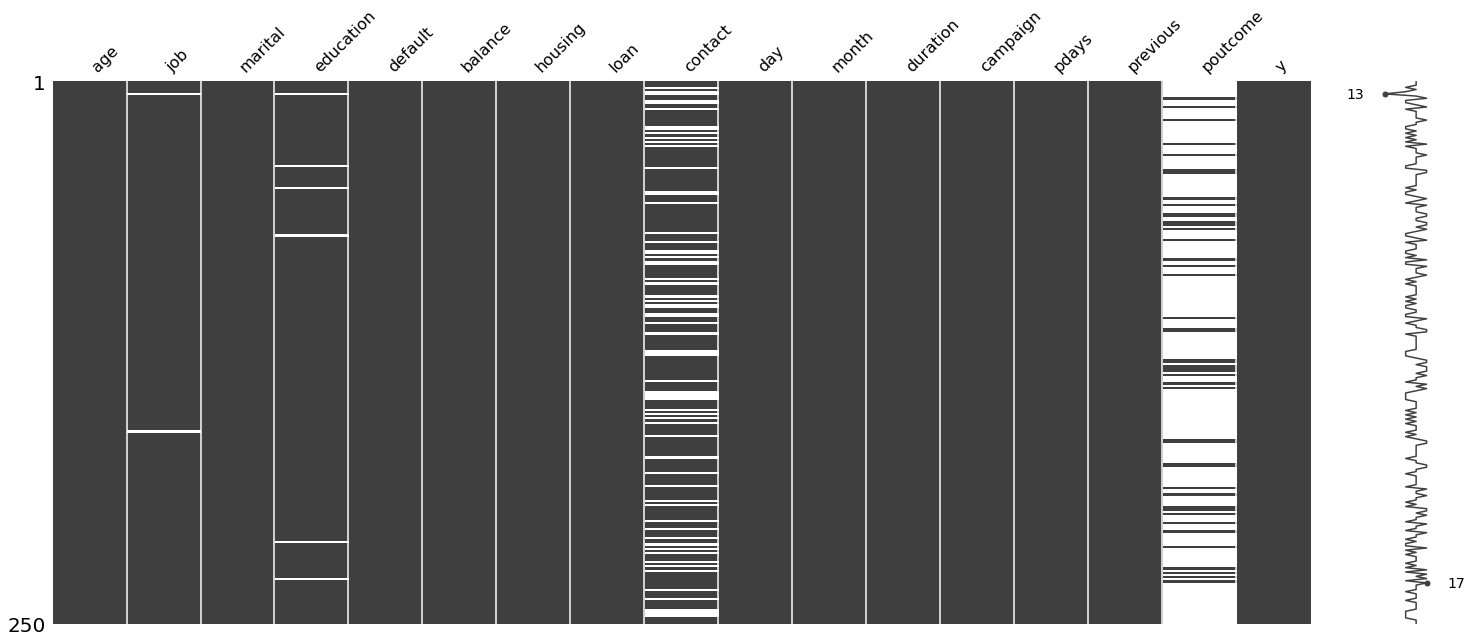

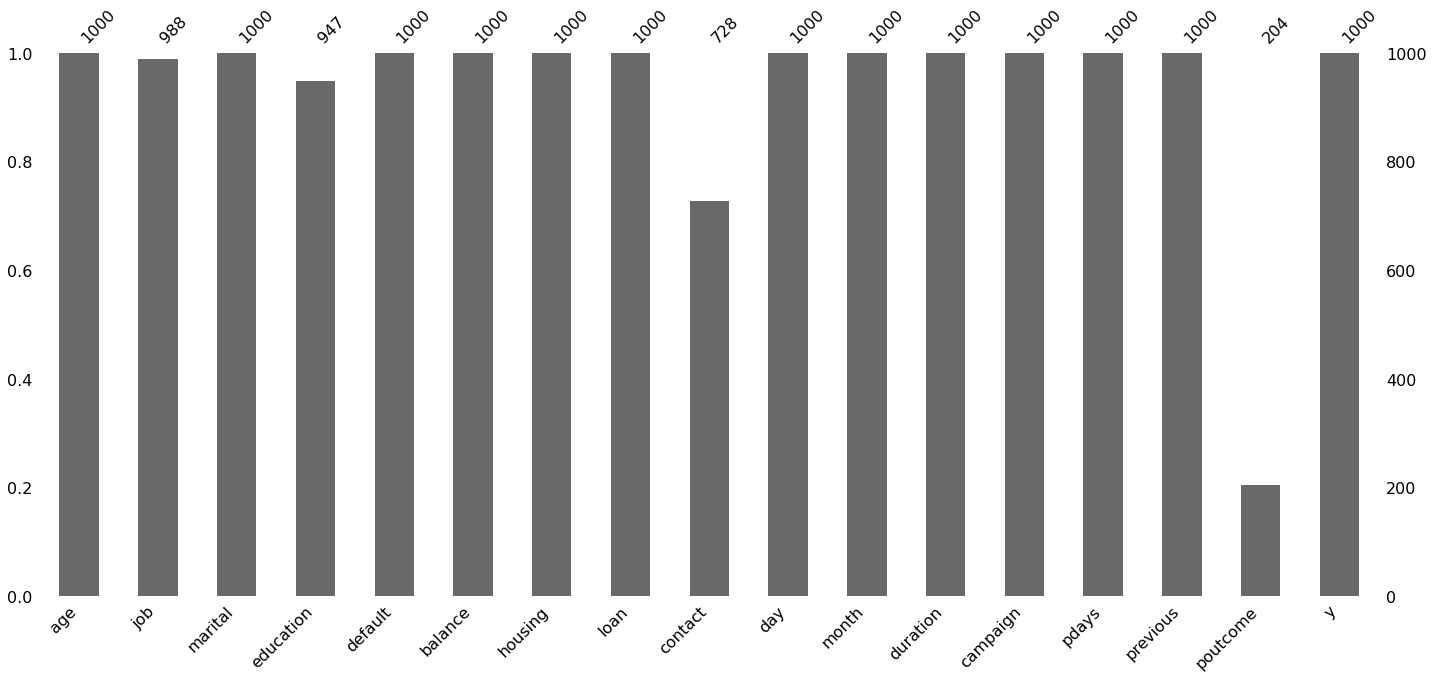

In [7]:
target = 'y'

# Giai đoạn exploratory data analysis (EDA) đầu vào

Đây là loại dữ liệu không cân bằng. Tuy nhiên, dữ liệu không cân bằng trong marketing là chuyện thường thấy, như số lượng click / không click trong một lượng tiếp cận, số lượng churn / not churn,... 
Problem về dữ liệu không cân bằng mình tìm hiểu nhiều, nhưng vẫn chưa có một phương pháp thỏa đáng xử lí. Hơn nữa cũng chưa thấy có report nào nói về tỉ lệ không cân bằng là bao nhiêu (trường hợp trong bài viết này là 8:1)

#### EDA sơ bộ những ý tưởng của mình trả lời những câu hỏi sau:

* Có sự khác biệt nào giữa người mua / không mua dựa vào tuổi hay không?
* Có sự khác biệt nào giữa người mua / không mua dựa vào yếu tố nghề nghiệp không?
* Có sự khác biệt nào giữa người mua / không mua dựa vào yếu tố học vấn không?
* Có tính chất gì lạ trong dữ liệu không?

# Quan sát trước về các ditribution Numeric Feature

In [36]:
import hieu_viet_code_ne

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

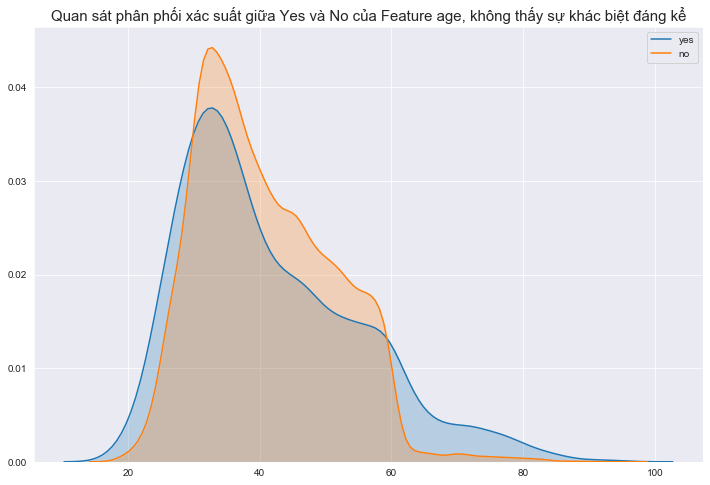

In [5]:
eda = pd.read_csv(r"https://raw.githubusercontent.com/cafechungkhoan/chu_gia/master/bank%20marketing.csv",delimiter=';')
yes = eda[eda.y=='yes']
no = eda[eda.y=='no']
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")
plt.title("Quan sát phân phối xác suất giữa Yes và No của Feature age, không thấy sự khác biệt đáng kể",{'fontsize': 15})
a = sns.kdeplot(data=yes['age'], label="yes", shade=True)
b = sns.kdeplot(data=no['age'],label="no" ,shade=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

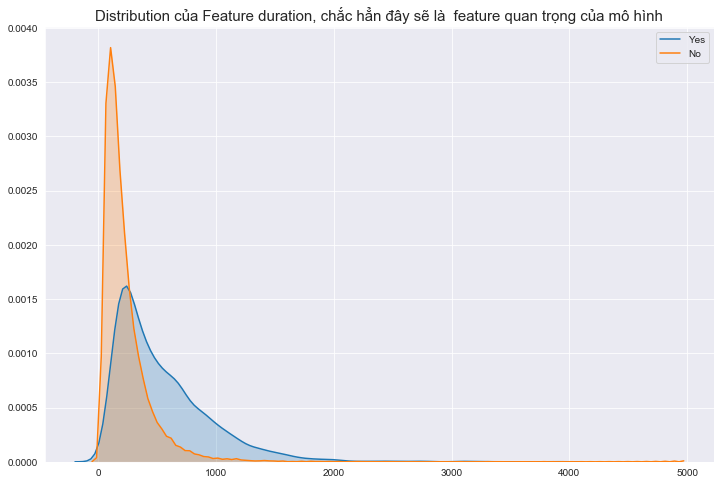

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

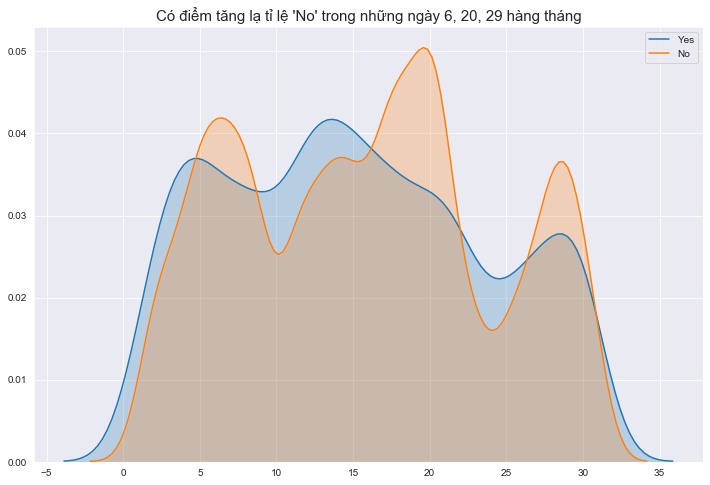

# PCA & EDA tổng quát các label Feature

Target looks like classification
Linear Discriminant Analysis training set score: 0.613


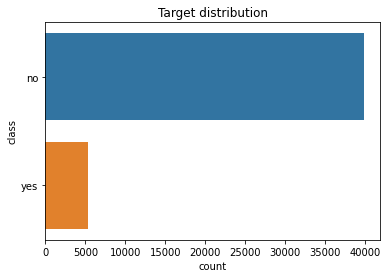

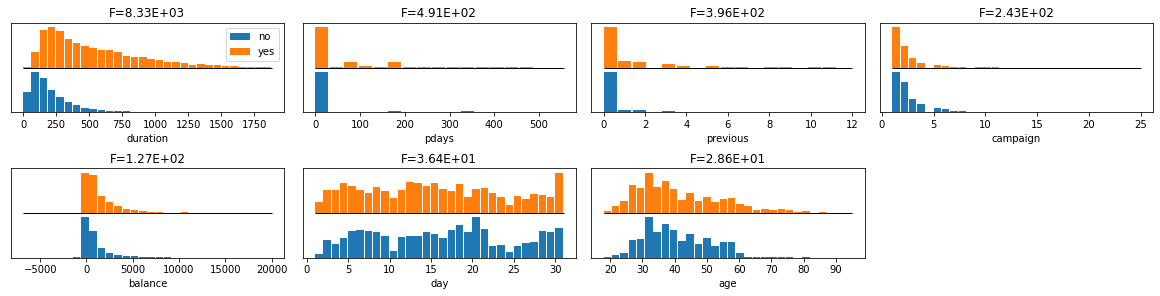

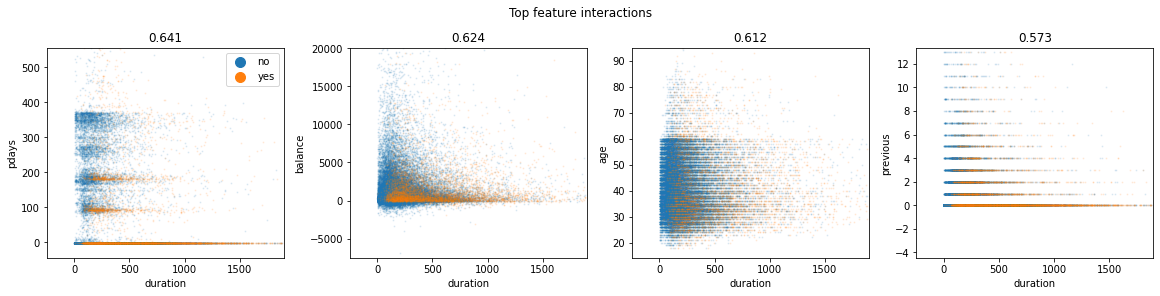

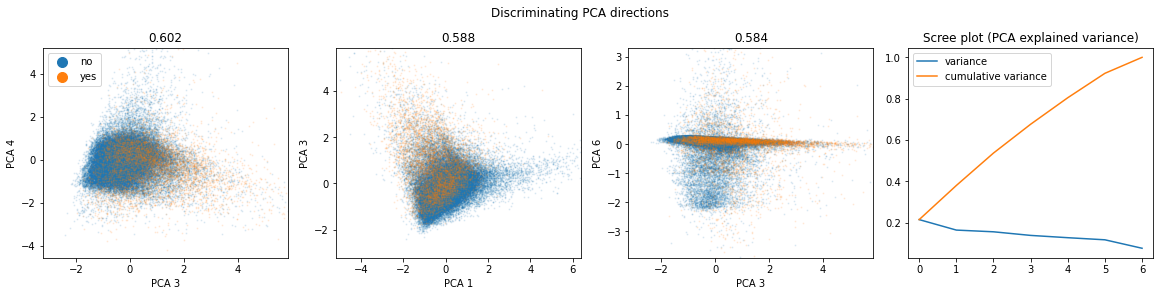

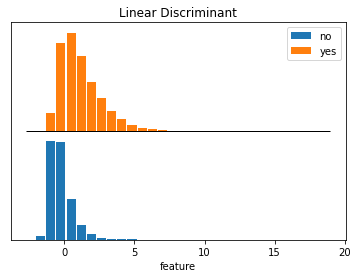

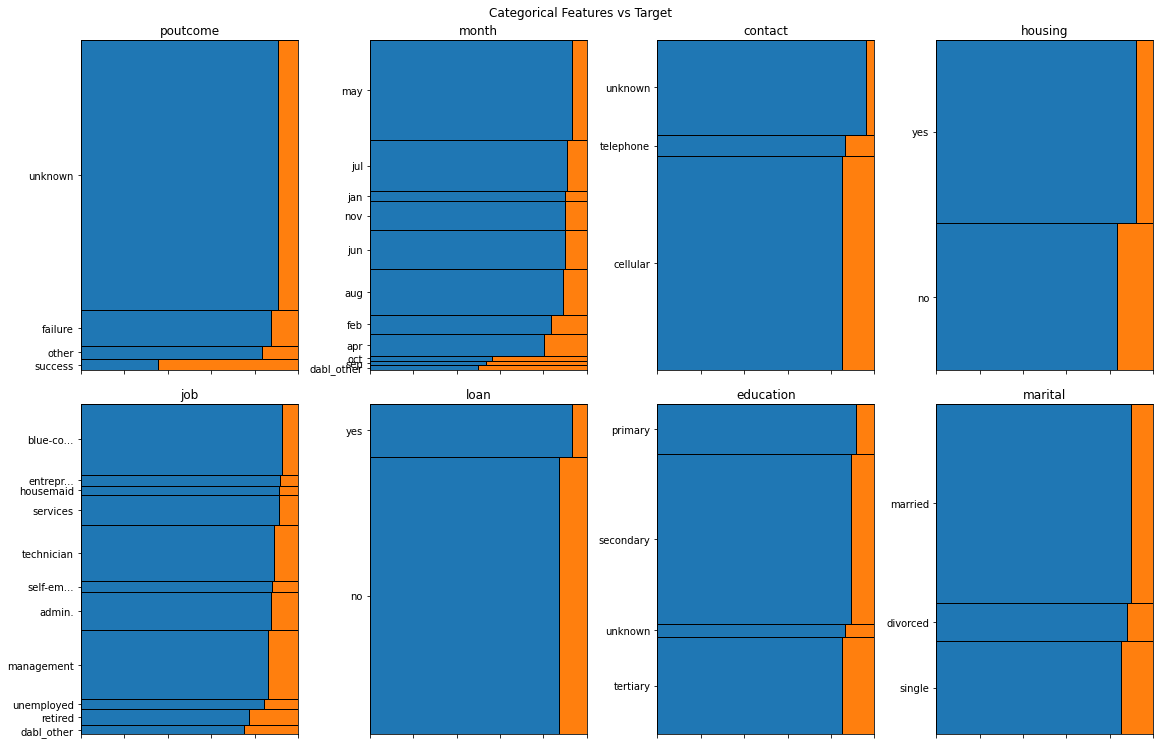

Quan sát kết quả EDA label tổng quát

* Nhận thấy có tỉ lệ thành công tốt đặc biệt với poutcome = success(yếu tố này cho biết là campaign trước thành công là dấu hiệu cho tỉ lệ thành công lần này cũng cao)
* Người thất nghiệp và đã nghỉ hưu lại có tỉ lệ tiếp cận thành công cao hơn các job khác
* Người không vay nợ lại có tỉ lệ tiếp cận thành công tốt hơn người có vay nợ.
* Người tốt nghiệp đại học có tỉ lệ tiếp cận thành công hơn những người mới có bằng primary hay secondary
* Người độc thân có tỉ lệ tiếp cận thành công hơn người đã có gia đình
* Người không có nhà có tỉ lệ tiếp cận thành công hơn người có nhà
* Tiếp cận bằng thiết bị di động có tỉ lệ tiếp cận thành công hơn người dùng các phương tiện khác

### Encoder dữ liệu để chạy mô hình

Hiện tại mình dùng `Label Encoder` cho yes/no feature và dùng `OneHot Encoder` cho các feature label còn lại

In [3]:
data = eda
data = data.drop(['poutcome','contact'] , axis = 1)
data = data.replace('yes',1)
data = data.replace('no',0)
data = pd.get_dummies(data)
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


Dùng data.shape thấy sau khi Onehot encoder dữ liệu, phát sinh ra đến 42 Feature, do đó cần lọc lại dữ liệu

In [66]:
data.shape

(45211, 42)

# Feature Selection

Có 4 vấn đề cần xử lí trong Feature Selection, trước khi vào giai đoạn Deep Learning: loại bỏ giá trị duy nhất (single unique value), tìm và xử lí các tính năng cộng tuyến (collinear features),tính năng có tầm quan trọng = 0 và tính năng kém quan trọng ( hiện tại bài viết mình xử lí bằng bằng gradient boosting machine) 

*Đọc thêm về Feture Selection bằng Gradient Boosting Machine* https://arxiv.org/abs/1901.04055

#### Thử ngưỡng đa cộng tuyến 0.8 thì vẫn ko có nên mình pass qua vấn đề này

Trực quan kết quả đa cộng tuyến bằng Dendogram

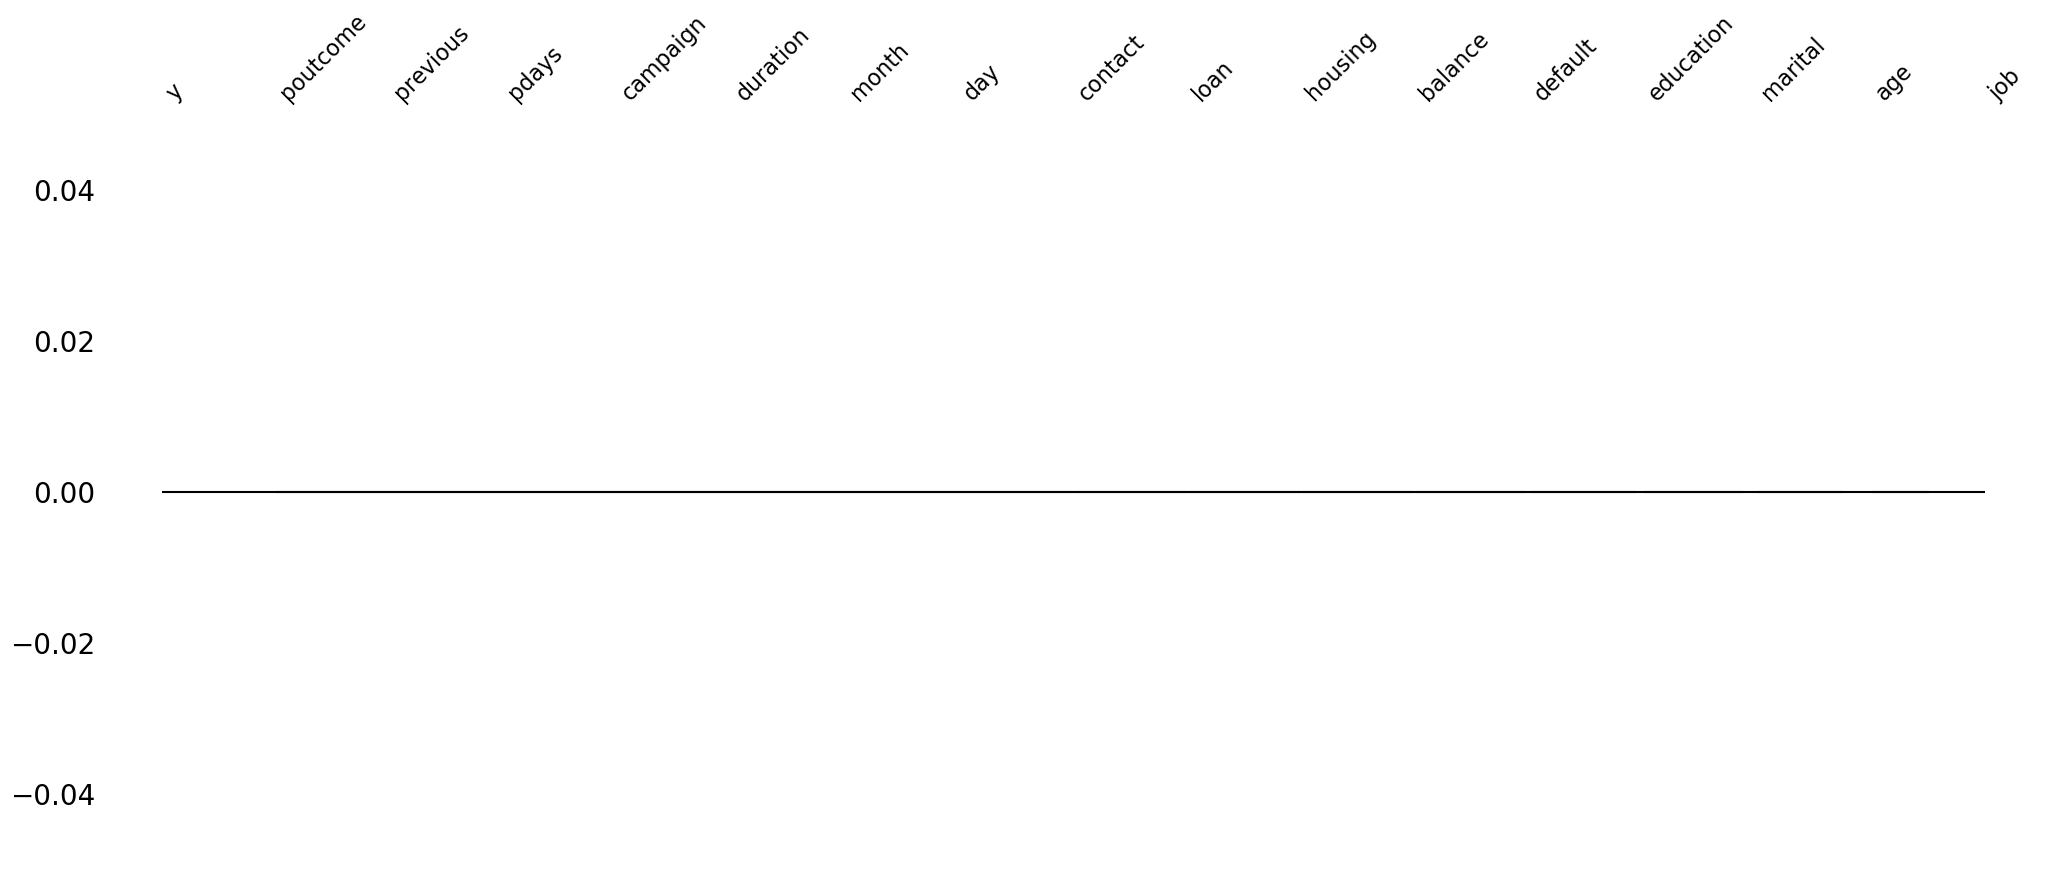

0 features with a correlation magnitude greater than 0.80.

[]


,drop_feature,corr_feature,corr_value


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[344]	valid_0's auc: 0.935519	valid_0's binary_logloss: 0.194667
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[278]	valid_0's auc: 0.935839	valid_0's binary_logloss: 0.194577
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[311]	valid_0's auc: 0.942968	valid_0's binary_logloss: 0.186193
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[198]	valid_0's auc: 0.934594	valid_0's binary_logloss: 0.196641
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[342]	valid_0's auc: 0.936459	valid_0's binary_logloss: 0.193615
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[471]	valid_0's auc: 0.94093	valid_0's binary_logloss: 0.18

#### Biểu diễn 20 Feature có ảnh hưởng đến kết quả

Chỉ nhìn vào đây, có thể cải thiện kết quả quảng cáo thông qua những feature hàng đầu như: duration, balance, day, age,...

Dựa vào kết quả Cumulative, mình giữ lại luôn 41 Feature để chạy mô hình, không drop feature nào cả.

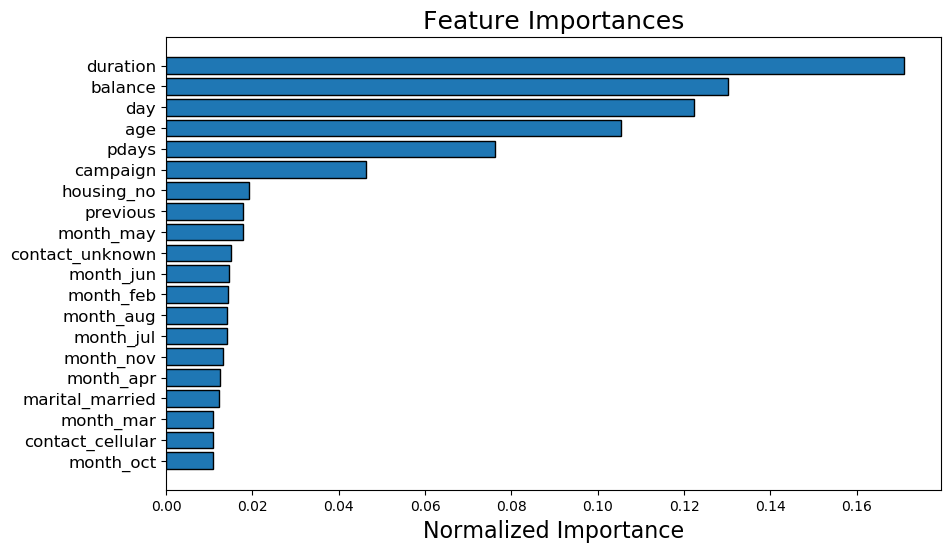

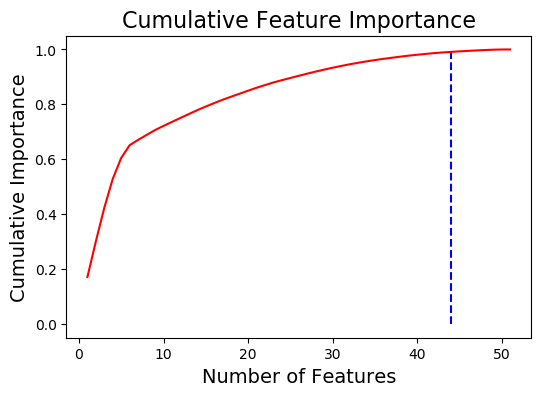

44 features required for 0.99 of cumulative importance


# Áp dụng Deep Learning để phân loại 

Mình đã `Tuning Model` bằng `RandomSearchCV` và pick activation = `sigmoid`, optimizer = `Adagrad` và batch_size = `16`. Loss function là: binary_crossentropy, metrics đánh giá mô hình là `accuracy`

Và bên dưới là kết quả:

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 41)                1722      
_________________________________________________________________
dense_10 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_11 (Dense)             (None, 41)                1722      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 42        
Total params: 5,208
Trainable params: 5,208
Non-trainable params: 0
_________________________________________________________________


In [70]:
a = model.fit(X_train, y_train, batch_size = 16, epochs = 500)
final_loss, final_acc = model.evaluate(X_test, y_test, verbose = 0)
print("Final loss (Test data): {0:.4f}, final accuracy (Test data): {1:.4f}".format(final_loss, final_acc))

Epoch 1/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.3022 - accuracy: 0.8829
Epoch 2/500
31647/31647 [==============================] - 2s 70us/step - loss: 0.2784 - accuracy: 0.8886
Epoch 3/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.2727 - accuracy: 0.8888
Epoch 4/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.2670 - accuracy: 0.8890
Epoch 5/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.2628 - accuracy: 0.8897
Epoch 6/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.2565 - accuracy: 0.8908
Epoch 7/500
31647/31647 [==============================] - 2s 71us/step - loss: 0.2523 - accuracy: 0.8906
Epoch 8/500
31647/31647 [==============================] - 2s 70us/step - loss: 0.2489 - accuracy: 0.8913
Epoch 9/500
31647/31647 [==============================] - 2s 69us/step - loss: 0.2463 - accuracy: 0.8917
Epoch 10/500
31647/31647 [====================

## Biểu diễn kết quả mô hình phân loại

Mô hình đơn giản nên khỏi biểu diễn Confusion Matrix, ROC,... nha mọi người

Chỉ biểu diễn Acuuracy và Loss của Model

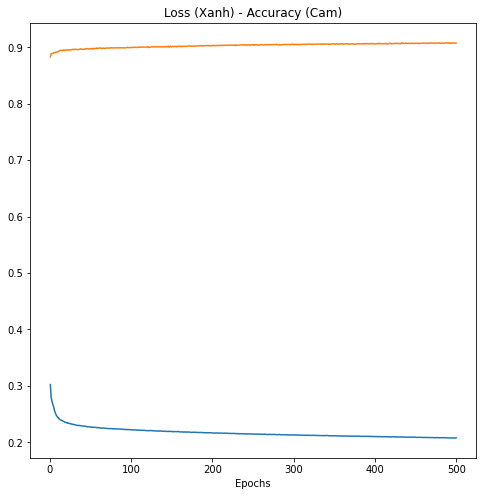